In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model

%matplotlib inline

In [2]:
world_data = pd.read_csv('world_population.csv')
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [3]:
world_data.shape

(234, 17)

In [4]:
world_data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
asia = world_data[world_data['Continent'] == 'Asia']
asia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 231
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         50 non-null     int64  
 1   CCA3                         50 non-null     object 
 2   Country                      50 non-null     object 
 3   Capital                      50 non-null     object 
 4   Continent                    50 non-null     object 
 5   2022 Population              50 non-null     int64  
 6   2020 Population              50 non-null     int64  
 7   2015 Population              50 non-null     int64  
 8   2010 Population              50 non-null     int64  
 9   2000 Population              50 non-null     int64  
 10  1990 Population              50 non-null     int64  
 11  1980 Population              50 non-null     int64  
 12  1970 Population              50 non-null     int64  
 13  Area (km²)           

In [6]:
asia.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,77.560000,9.442767e+07,9.326173e+07,8.916500e+07,8.440083e+07,7.470179e+07,6.421127e+07,5.270668e+07,4.289813e+07,6.427628e+05,1025.024136,1.009384,1.183800
std,53.633739,2.797207e+08,2.775374e+08,2.672775e+08,2.548406e+08,2.294235e+08,2.010543e+08,1.676305e+08,1.383442e+08,1.495049e+06,3535.091414,0.009213,3.507563
min,1.000000,4.490020e+05,4.417250e+05,4.214370e+05,3.615750e+05,2.825070e+05,2.249570e+05,1.648870e+05,1.180070e+05,3.000000e+01,2.172700,0.981600,0.010000
25%,30.500000,5.309989e+06,5.180282e+06,4.775965e+06,4.243158e+06,3.469900e+06,3.136804e+06,2.262860e+06,1.683488e+06,3.135550e+04,71.512850,1.004400,0.070000
50%,69.500000,1.808292e+07,1.768805e+07,1.662672e+07,1.549568e+07,1.367755e+07,9.802802e+06,7.641007e+06,6.212695e+06,1.643025e+05,122.965150,1.008100,0.225000
75%,121.250000,4.998589e+07,4.952276e+07,4.768525e+07,4.442600e+07,4.038514e+07,3.527455e+07,2.962441e+07,2.421230e+07,5.068650e+05,336.346625,1.015000,0.627500
max,175.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,9.706961e+06,23172.266700,1.037600,17.880000


In [7]:
pop_totals = []
pop_columns = asia.columns[5:13].tolist()
pop_columns.reverse()
for column in pop_columns:
    pop_totals.append(asia[column].sum())
#pop_totals
#pop_columns

years = []
for column in pop_columns:
    column.split()
    year = column[0:5]
    years.append(year.strip())

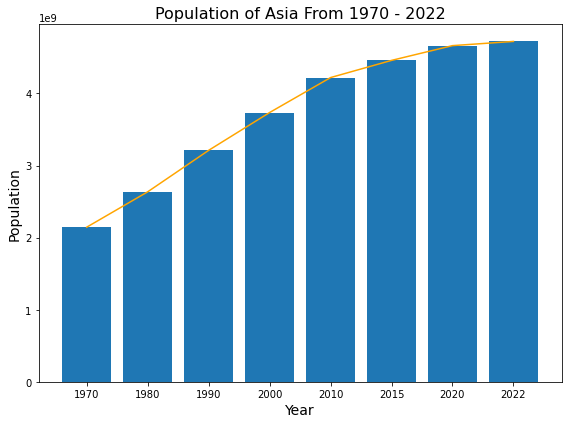

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(years, pop_totals)
ax.plot(years, pop_totals, color = 'orange')

ax.set_title('Population of Asia From 1970 - 2022', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
fig.tight_layout()

In [9]:
armenia = asia[asia['Country'] == 'Armenia']
nepal = asia[asia['Country'] == 'Nepal']
pakistan = asia[asia['Country'] == 'Pakistan']
s_korea = asia[asia['Country'] == 'South Korea']
sri_lanka = asia[asia['Country'] == 'Sri Lanka']
vietnam = asia[asia['Country'] == 'Vietnam']
data = pd.concat([armenia, nepal, pakistan, s_korea, sri_lanka, vietnam])
data

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03
143,49,NPL,Nepal,Kathmandu,Asia,30547580,29348627,27610325,27161567,24559500,19616530,15600442,12501285,147181,207.5511,1.0171,0.38
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
194,29,KOR,South Korea,Seoul,Asia,51815810,51844690,50994401,48813042,46788591,44120039,38170501,32601143,100210,517.0722,0.9997,0.65
197,61,LKA,Sri Lanka,Colombo,Asia,21832143,21715079,21336697,20668557,18776371,17204094,14943645,12388769,65610,332.7563,1.0027,0.27
228,16,VNM,Vietnam,Hanoi,Asia,98186856,96648685,92191398,87411012,79001142,66912613,52968270,41928849,331212,296.4472,1.0074,1.23


In [10]:
pakistan = data[data.Country == 'Pakistan']
pak = pakistan.values
pop_array = pak[0, 5:13]

pakistan_pop = []
for i in range(len(pop_array)):
    pakistan_pop.append(pop_array[i])
    
pakistan_pop.reverse()

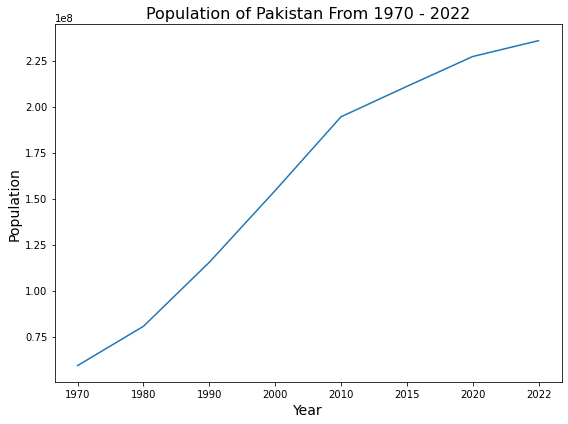

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
pakistan = ax.plot(years, pakistan_pop, label='Pakistan')

ax.set_title('Population of Pakistan From 1970 - 2022', fontsize = 16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
fig.tight_layout()

In [12]:
armenia = pakistan = data[data.Country == 'Armenia']
arm = armenia.values
arm_array = arm[0, 5:13]

armenia_pop = []
for i in range(len(arm_array)):
    armenia_pop.append(arm_array[i])
    
armenia_pop.reverse()

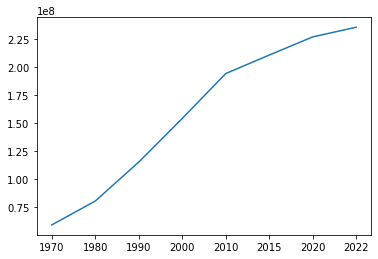

In [13]:
#Population Change of Pakistan from 1970 to 2022
pakistan = asia[asia['Country'] == 'Pakistan']
pak = pakistan.values
pop_array = pak[0, 5:13]

pakistan_pop_list = []
for i in range(len(pop_array)):
    pakistan_pop_list.append(pop_array[i])
    
pakistan_pop_list.reverse()

plt.plot(years, pakistan_pop_list)

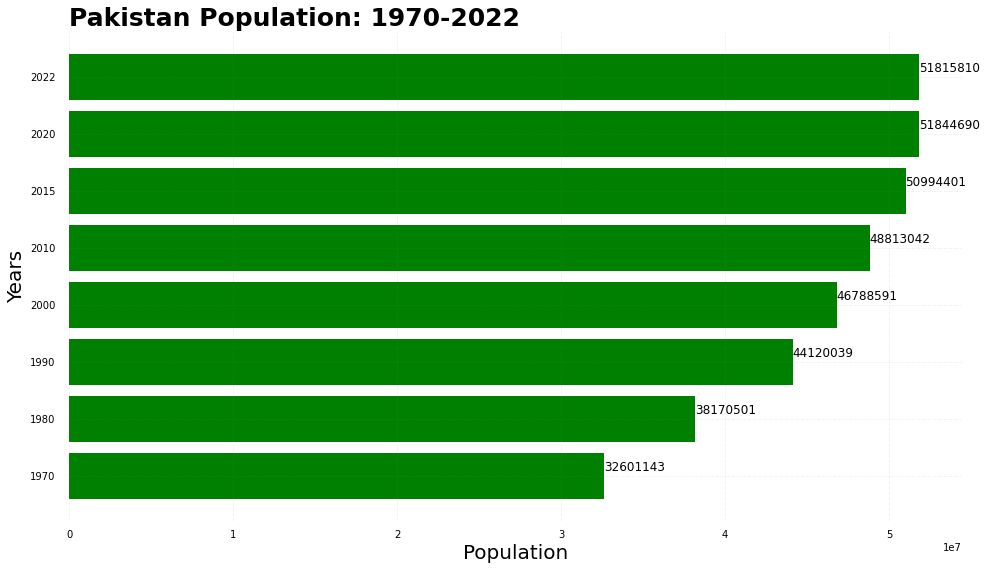

In [19]:
# Size of graph
fig, ax = plt.subplots(figsize =(16, 9))

# Hz Bar Plot
ax.barh(years, pop_list, color ='green')



# Remove axes splines, so the numbers dont get cut off from the lines of the graph
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)



# Add annotation to bars
for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
            str(round((i.get_width()), 2)),
            fontsize = 12, 
            color ='black')

# Title
ax.set_title('Pakistan Population: 1970-2022', fontsize = 25, fontweight = 'bold',
            loc ='left', )

#axes
plt.ylabel("Years", fontsize = 20)
plt.xlabel("Population", fontsize =20)

# Show Plot
plt.show()

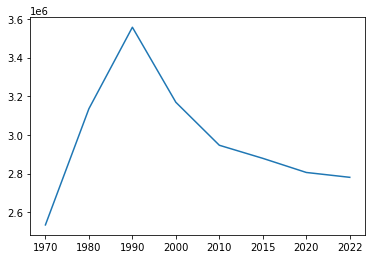

In [14]:
#Population Change of Armenia from 1970 to 2022
armenia = asia[asia['Country'] == 'Armenia']
armenia
arm = armenia.values
arm_array = arm[0, 5:13]

armenia_pop_list = []
for i in range(len(arm_array)):
    armenia_pop_list.append(arm_array[i])
    
armenia_pop_list.reverse()

plt.plot(years, armenia_pop_list)

In [15]:
south_korea = asia[asia['Country'] == 'South Korea']
kor = south_korea.values
pop_array = kor[0, 5:13]

pop_list = []
for i in range(len(pop_array)):
    pop_list.append(pop_array[i])
    
pop_list.reverse()

fig.tight_layout()

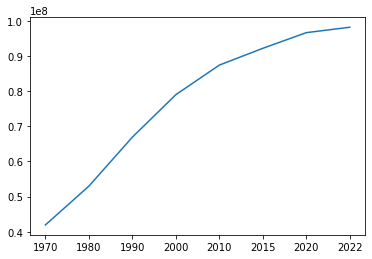

In [16]:
#Population Change of Vietnam from 1970 to 2022
vietnam = asia[asia['Country'] == 'Vietnam']
vietnam
viet = vietnam.values
viet_arr = viet[0,5:13]

vietnam_pop_list = []
for i in range(len(viet_arr)):
    vietnam_pop_list.append(viet_arr[i])
    
vietnam_pop_list.reverse()

plt.plot(years,vietnam_pop_list)

Text(0, 0.5, 'Population(in millions)')

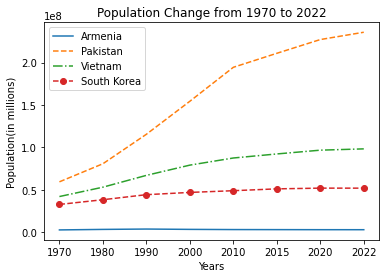

In [17]:
# Graph includings all countries
plt.plot(years, armenia_pop_list, label = 'Armenia', )
plt.plot(years, pakistan_pop_list, label = 'Pakistan',linestyle = '--')
plt.plot(years,vietnam_pop_list, label = 'Vietnam', linestyle = '-.')
plt.plot(years,pop_list, label = 'South Korea', linestyle = '--', marker = 'o')
plt.legend(loc = 'upper left')

plt.title('Population Change from 1970 to 2022')
plt.xlabel('Years')
plt.ylabel('Population(in millions)')